# Determinación normalidad de una muestra con grupos

## 0.Preparación librerias y definición de fórmulas

In [1]:
#Importación de librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

In [12]:
#Definición calculo de residuos

def res(group):
    """
    Calculate residual for a grup
    """
    resgroup =group.iloc[:,0]-group.iloc[:,0].mean()
    df_res=pd.DataFrame(resgroup)
    return df_res

In [91]:
#Definición de la hipotesis de normalidad 
def group_errors_assumption(df,group, p_value_thresh):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    
    print('Assumption: The error terms are normally distributed', '\n')
    
    #Choosing the group
    dfgroup=df[df.iloc[:,1]==group]
    label=dfgroup.columns[1]
    print('------------------',label,':',group,'------------------','\n')
    # Calculating residuals for the Anderson-Darling test
    df_results = res(dfgroup)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results.iloc[:,0])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed', '\n')
    else:
        print('Residuals are normally distributed', '\n')
    
    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test = shapiro(df_results.iloc[:,0])
    shapiro_test_stat=shapiro_test[0]
    shapiro_test_pvalue=shapiro_test[1]
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
    # Reporting the normality of the residuals
    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals for: '+ label + ' '+  str(group))
    sns.distplot(df_results.iloc[:,0])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

## 1.Preanalisis de los datos

In [3]:
file = './datos/iq.csv'

In [43]:
# Carga de datos
df_data=pd.read_csv(file)

---Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
IQ        40 non-null float64
School    40 non-null float64
dtypes: float64(2)
memory usage: 720.0 bytes

 ---Cinco primeros registros---
      IQ  School
0  147.0     2.0
1  140.0     2.0
2  141.0     1.0
3  141.0     1.0
4  142.0     2.0 


 ---Scatter plot---


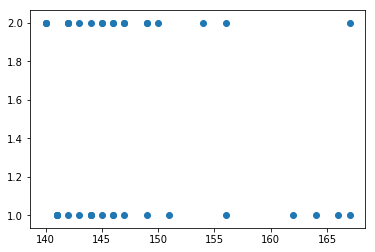

In [44]:
#Forma del dataframe
print('---Info---')
df_data.info()

#Impresion 5 primeras filas
print('\n','---Cinco primeros registros---')
print(df.head(),'\n')
print('\n','---Scatter plot---')
plt.scatter(df.iloc[:,0], df.iloc[:,1])

## 2. Comprobación de la normalidad

### Determinación de los grupo

In [7]:
group1=df[df.iloc[:,1]==1.0]
group2=df[df.iloc[:,1]==2.0]


In [14]:
res1 = res(group1)
res2 = res(group2)

Assumption: The error terms are normally distributed 

------------------ School : 1 ------------------ 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.00031705273647239117
Residuals are not normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0009394694934599102
Residuals are not normally distributed


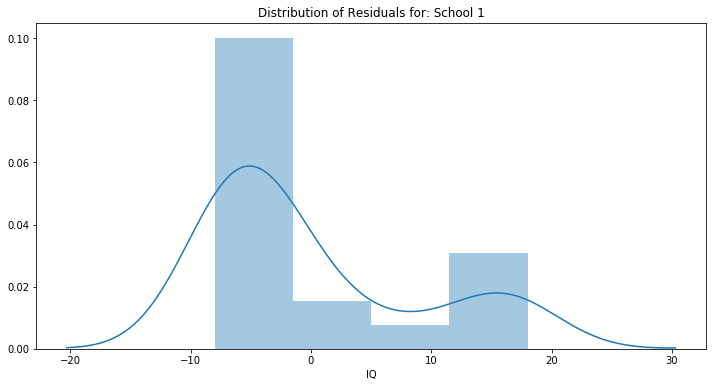


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [92]:
group_errors_assumption(df_data,1,0.05)

Assumption: The error terms are normally distributed 

------------------ School : 2 ------------------ 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.01668376405845095
Residuals are not normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0037091043777763844
Residuals are not normally distributed


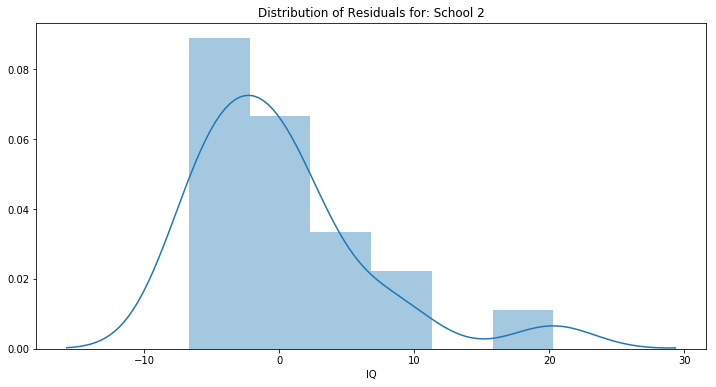


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [93]:
group_errors_assumption(df_data,2,0.05)